# CSC591/791 Real-TIme AI and High Performance Machine Learning Systems (Homak Patel (hppatel4))


### **1.Loading Model from Github repository**

In [1]:
!git clone https://github.com/sirius-ai/LPRNet_Pytorch.git
%cd LPRNet_Pytorch
!ls

fatal: destination path 'LPRNet_Pytorch' already exists and is not an empty directory.
/content/LPRNet_Pytorch
autoscheduler_history.json  model			       test_LPRNet.py
data			    original_model_size.onnx	       train_LPRNet.py
Final_LPRNet_model.pth	    pruned_model_size.onnx	       tuning.log
Final_tvm_lprnet.onnx	    quantized_model_size.onnx	       weights
LICENSE			    quantized_pruned_LPRNet_model.pth
LPRNet_Pytorch		    README.md


In [2]:
!pip install opencv-python imutils Pillow numpy

In [3]:
!pip install torch torchvision torchaudio opencv-python

In [4]:
!wget -O Final_LPRNet_model.pth https://github.com/sirius-ai/LPRNet_Pytorch/raw/master/weights/Final_LPRNet_model.pth

--2024-12-08 14:59:43--  https://github.com/sirius-ai/LPRNet_Pytorch/raw/master/weights/Final_LPRNet_model.pth
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sirius-ai/LPRNet_Pytorch/master/weights/Final_LPRNet_model.pth [following]
--2024-12-08 14:59:44--  https://raw.githubusercontent.com/sirius-ai/LPRNet_Pytorch/master/weights/Final_LPRNet_model.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1806995 (1.7M) [application/octet-stream]
Saving to: ‘Final_LPRNet_model.pth’

Final_LPRNet_model. 100%[===================>]   1.72M  --.-KB/s    in 0.07s   

2024-12-08 14:59:44 (25.9 MB/s) - ‘Fin

In [5]:
!pip install lightning numpy torch tqdm PyYAML opencv-python imutils rich

In [6]:
!pip install numpy protobuf==3.16.0

  Using cached protobuf-3.16.0-py2.py3-none-any.whl.metadata (858 bytes)
Using cached protobuf-3.16.0-py2.py3-none-any.whl (173 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.16.0 which is incompatible.
google-api-core 2.19.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.19.5, but you have protobuf 3.16.0 which is incompatible.
google-cloud-aiplatform 1.73.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.16.0 which is incom

In [7]:
!pip install onnx

  Using cached protobuf-5.29.1-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
Using cached protobuf-5.29.1-cp38-abi3-manylinux2014_x86_64.whl (319 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.16.0
    Uninstalling protobuf-3.16.0:
      Successfully uninstalled protobuf-3.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.1 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 5.29.1 which is incompatible.


In [8]:
!pip install onnxruntime

In [9]:
!python3 -m  pip install mlc-ai-cpu -f https://mlc.ai/wheels
!pip install torch
!pip install torchvision
!pip install tensorflow

Looking in links: https://mlc.ai/wheels
  Using cached protobuf-4.25.5-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
Using cached protobuf-4.25.5-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.1
    Uninstalling protobuf-5.29.1:
      Successfully uninstalled protobuf-5.29.1


In [10]:
!pip install apache-tvm

### **2. Importing necessary Libraries**

In [11]:
!ls

autoscheduler_history.json  model			       test_LPRNet.py
data			    original_model_size.onnx	       train_LPRNet.py
Final_LPRNet_model.pth	    pruned_model_size.onnx	       tuning.log
Final_tvm_lprnet.onnx	    quantized_model_size.onnx	       weights
LICENSE			    quantized_pruned_LPRNet_model.pth
LPRNet_Pytorch		    README.md


In [12]:
import os
import sys
import time
import subprocess
import re
from typing import Dict
from collections import OrderedDict
import types
import argparse

import torch
import torch.nn as nn
import torch.onnx
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.quantization
from torch.quantization import quantize_dynamic
from torch.utils.data import DataLoader
import numpy as np
import tvm
from tvm import relay, auto_scheduler
from tvm.contrib import graph_executor
import tvm.relay.testing
import onnx
from tvm import autotvm
import matplotlib.pyplot as plt


sys.path.append('/content/LPRNet_Pytorch')  # Add project path
os.chdir('/content/LPRNet_Pytorch')         # Set working directory
from data.load_data import LPRDataLoader, CHARS, CHARS_DICT
from model.LPRNet import LPRNet, build_lprnet

import importlib
importlib.invalidate_caches()


In [13]:
test_accuracies = {}
inference_times = {}
model_sizes_onnx = {}
model_size_nonzero_parms = {}

### **3 Loading the pre-trained model**

In [14]:
def initialize_model(pretrained_path):
    model = LPRNet(lpr_max_len=8, phase=False, class_num=68, dropout_rate=0.5)
    checkpoint = torch.load(pretrained_path, map_location=torch.device('cpu'))
    if 'state_dict' in checkpoint:
        model.load_state_dict(checkpoint['state_dict'])
    elif 'lprnet' in checkpoint:
        model.load_state_dict(checkpoint['lprnet'])
    else:
        model.load_state_dict(checkpoint)
    model.eval()
    return model

pretrained_model_path = './Final_LPRNet_model.pth'

In [15]:
sys.argv = [sys.argv[0]] + sys.argv[3:]

def parse_arguments():
    parser = argparse.ArgumentParser(description="LPRNet Testing Parameters")
    parser.add_argument("--image_size", default=[94, 24], type=list, help="Size of input images")
    parser.add_argument("--test_image_dir", default="./data/test", type=str, help="Directory for test images")
    parser.add_argument("--dropout", default=0.0, type=float, help="Dropout rate for the model")
    parser.add_argument("--max_plate_length", default=8, type=int, help="Maximum length of license plate number")
    parser.add_argument("--batch_size", default=100, type=int, help="Batch size for testing")
    parser.add_argument("--train_phase", default=False, type=bool, help="Flag for training or testing phase")
    parser.add_argument("--num_workers", default=2, type=int, help="Number of data loading workers")
    parser.add_argument("--use_cuda", default=False, type=bool, help="Use CUDA for computation")
    parser.add_argument("--visualize", default=False, type=bool, help="Visualize test results")
    parser.add_argument("--model_checkpoint", default="./weights/Final_LPRNet_model.pth", help="Path to model checkpoint")
    return parser.parse_args()


In [16]:
# Load the pretrained model
lprnet = initialize_model(pretrained_model_path)
print("Pretrained LPRNet successfully loaded!")
print("\nModel Architecture:")
print(lprnet)

Pretrained LPRNet successfully loaded!

Model Architecture:
LPRNet(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=0, dilation=1, ceil_mode=False)
    (4): small_basic_block(
      (block): Sequential(
        (0): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
        (1): ReLU()
        (2): Conv2d(32, 32, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0))
        (3): ReLU()
        (4): Conv2d(32, 32, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
        (5): ReLU()
        (6): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool3d(kernel_size=(1, 3, 3), stride=(2, 1, 2), padding=0, dilation=1, ceil_mode=False)
    (8): small_basic_bl

<ipython-input-14-0999317addba>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretrained_path, map_location=torch.device('cpu'))


In [17]:
def measure_inference_time(model, input_tensor, num_iterations=100):
    model.eval()
    start_time = time.time()
    with torch.no_grad():
        for _ in range(num_iterations):
            _ = model(input_tensor)
    end_time = time.time()
    total_time = (end_time - start_time) * 1000
    return total_time/ num_iterations

In [18]:
def export_to_onnx(model, output_path):
    dummy_input = torch.randn(1, 3, 24, 94)
    torch.onnx.export(model, dummy_input, output_path, input_names=['input'], output_names=['output'])
    file_size = os.path.getsize(output_path) / 1024  # Size in KB
    print(f"Exported pruned model to {output_path}")
    print(f"Pruned model size: {file_size:.2f} KB")
    return file_size

In [19]:
def collate_fn(batch):
    images, labels = [], []
    for image, label in batch:
        if label.numel() > 0:  # Check if label is not empty
            images.append(image)
            labels.append(label)
    return torch.stack(images), labels


# Load test dataset
test_dataset = LPRDataLoader(img_dir='/content/LPRNet_Pytorch/data/test',
                             imgSize=(94, 24),
                             lpr_max_len=8)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, collate_fn = collate_fn)

In [20]:
def test_model(pretrained_model_path):
    test_command = (
        f"python test_LPRNet.py --test_img_dirs /content/LPRNet_Pytorch/data/test "
        f"--pretrained_model {pretrained_model_path}"
    )

    process = subprocess.run(test_command, shell=True, capture_output=True, text=True)
    print(process.stdout)

    match = re.search(r"Accuracy: ([\d.]+)", process.stdout)
    if match:
        return float(match.group(1))
    else:
        print("Could not find accuracy in the script output.")
        return None


model_path = '/content/LPRNet_Pytorch/Final_LPRNet_model.pth'

original_model = LPRNet(lpr_max_len=8, phase=False, class_num=68, dropout_rate=0.5)

original_model_size = export_to_onnx(original_model, "original_model_size.onnx")
model_sizes_onnx["Original Model"] = original_model_size

# Evaluate the original model
print("Testing the original LPRNet model...")
accuracy = test_model(model_path)


if accuracy is not None:
    print(f"Accuracy of the original model: {accuracy:.4f}")
    test_accuracies["Original Model Accuracy"] = accuracy
else:
    print("Model evaluation did not return an accuracy value.")

Exported pruned model to original_model_size.onnx
Pruned model size: 1747.25 KB
Testing the original LPRNet model...
Successful to build network!
load pretrained model successful!
[Info] Test Accuracy: 0.898 [898:59:43:1000]
[Info] Test Speed: 0.0008252089023590088s 1/1000]

Accuracy of the original model: 0.8980


### **4. Pruning (Model Optimization-1)**

In [21]:
def fine_grained_prune(tensor: torch.Tensor, sparsity: float) -> torch.Tensor:
    sparsity = min(max(0.0, sparsity), 1.0)
    if sparsity == 1.0:
        tensor.zero_()
        return torch.zeros_like(tensor)
    elif sparsity == 0.0:
        return torch.ones_like(tensor)

    num_elements = tensor.numel()
    num_zeros = round(num_elements * sparsity)
    importance = tensor.abs()
    threshold = importance.view(-1).kthvalue(num_zeros).values
    mask = torch.gt(importance, threshold)
    tensor.mul_(mask)
    return mask

In [22]:
class FineGrainedPruner:
    """
    Prunes the given model based on specified sparsity for each parameter.
    """
    def __init__(self, model, sparsity_dict: Dict[str, float]):
        self.masks = FineGrainedPruner.prune(model, sparsity_dict)

    @torch.no_grad()
    def apply(self, model):
        for name, param in model.named_parameters():
            if name in self.masks:
                param.mul_(self.masks[name])

    @staticmethod
    @torch.no_grad()
    def prune(model, sparsity_dict: Dict[str, float]):
        masks = OrderedDict()
        for name, param in model.named_parameters():
            if param.dim() > 1:  # Only prune weights with more than one dimension (conv/fc layers)
                sparsity = sparsity_dict.get(name, 0.0)
                masks[name] = fine_grained_prune(param, sparsity)
        return masks

In [23]:
def initialize_model(pretrained_path):
    model = LPRNet(lpr_max_len=8, phase=False, class_num=68, dropout_rate=0.5)
    checkpoint = torch.load(pretrained_path, map_location=torch.device('cpu'))
    if 'state_dict' in checkpoint:
        model.load_state_dict(checkpoint['state_dict'])
    elif 'lprnet' in checkpoint:
        model.load_state_dict(checkpoint['lprnet'])
    else:
        model.load_state_dict(checkpoint)
    model.eval()
    return model

In [24]:
# Function to test the model using an external script
def test_model(pretrained_model_path):
    test_command = (
        f"python test_LPRNet.py --test_img_dirs /content/LPRNet_Pytorch/data/test "
        f"--pretrained_model {pretrained_model_path}"
    )
    process = subprocess.run(test_command, shell=True, capture_output=True, text=True)
    print(process.stdout)
    match = re.search(r"Accuracy: ([\d.]+)", process.stdout)
    return float(match.group(1)) if match else None

In [25]:
def get_model_sparsity(model):
    total_elements = 0
    total_zeros = 0
    for name, param in model.named_parameters():
        if param.requires_grad and param.dim() > 1:  # Only consider trainable parameters
            total_elements += param.numel()
            total_zeros += param.numel() - param.count_nonzero().item()
            print(f"{name}: Sparsity = {(1 - param.count_nonzero().item() / param.numel()) * 100:.2f}%")
    overall_sparsity = (total_zeros / total_elements) * 100
    print(f"Overall Model Sparsity: {overall_sparsity:.2f}%")
    return overall_sparsity

In [26]:
def get_model_size(model):
    num_nonzeros = sum(param.count_nonzero().item() for param in model.parameters())
    print(f"Number of Non-Zero Parameters: {num_nonzeros}")
    return num_nonzeros

In [27]:
def count_non_zero_params(model):
    non_zero_params = 0
    for param in model.parameters():
        non_zero_params += torch.count_nonzero(param).item()  # Count non-zero elements in the parameter
    return non_zero_params

In [28]:
# Main script
if __name__ == "__main__":
    pretrained_model_path = './Final_LPRNet_model.pth'

    lprnet = initialize_model(pretrained_model_path)
    print("Pretrained LPRNet successfully loaded!")

    print("\nModel Architecture:")
    print(lprnet)

    dummy_input = torch.randn(1, 3, 24, 94)
    original_inference_time = measure_inference_time(lprnet, dummy_input)

    print(f"Inference time of the original model: {original_inference_time:.2f} ms")
    inference_times["Original Model Inference Time"] = original_inference_time
    model_size_nonzero_parms["Original Model Non-Zero Parameters"] = count_non_zero_params(lprnet)

    print("Model size before pruning:")
    original_size = get_model_size(lprnet)

    # Define sparsity for pruning
    sparsity_dict = {name: 0.50 for name, param in lprnet.named_parameters() if param.dim() > 1}  # 75% sparsity

    # Apply pruning
    print("Applying pruning...")
    pruner = FineGrainedPruner(lprnet, sparsity_dict)
    pruner.apply(lprnet)
    print("Pruning applied successfully!")

    print("Model size after pruning:")
    pruned_size = get_model_size(lprnet)




    # Export pruned model to ONNX
    pruned_model_size = export_to_onnx(lprnet, "pruned_model_size.onnx")
    model_sizes_onnx["Pruned Model Size (ONNX)"] = pruned_model_size
    model_size_nonzero_parms["Pruned Model Non-Zero Parameters"] = count_non_zero_params(lprnet)

    pruned_inference_time = measure_inference_time(lprnet, dummy_input)
    inference_times["Pruned Model Inference Time"] = pruned_inference_time
    print(f"Inference time of the pruned model: {pruned_inference_time:.2f} ms")

    print("Testing the pruned LPRNet model...")
    accuracy = test_model(pretrained_model_path)
    if accuracy is not None:
        print(f"Accuracy of the pruned model: {accuracy:.4f}")
        test_accuracies["Pruned Model Accuracy"] = accuracy
    else:
        print("Model evaluation did not return an accuracy value.")

Pretrained LPRNet successfully loaded!

Model Architecture:
LPRNet(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=0, dilation=1, ceil_mode=False)
    (4): small_basic_block(
      (block): Sequential(
        (0): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
        (1): ReLU()
        (2): Conv2d(32, 32, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0))
        (3): ReLU()
        (4): Conv2d(32, 32, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
        (5): ReLU()
        (6): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool3d(kernel_size=(1, 3, 3), stride=(2, 1, 2), padding=0, dilation=1, ceil_mode=False)
    (8): small_basic_bl

<ipython-input-23-f9b33ad91f67>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretrained_path, map_location=torch.device('cpu'))


Inference time of the original model: 195.74 ms
Model size before pruning:
Number of Non-Zero Parameters: 446975
Applying pruning...
Pruning applied successfully!
Model size after pruning:
Number of Non-Zero Parameters: 225301
Exported pruned model to pruned_model_size.onnx
Pruned model size: 1747.25 KB
Inference time of the pruned model: 109.12 ms
Testing the pruned LPRNet model...
Successful to build network!
load pretrained model successful!
[Info] Test Accuracy: 0.9 [900:60:40:1000]
[Info] Test Speed: 0.0010587525367736815s 1/1000]

Accuracy of the pruned model: 0.9000


### **5. Quantization (Model Optimization-2)**

In [29]:
#Quantization Function
def apply_dynamic_quantization(model):
    quantized_model = torch.quantization.quantize_dynamic(
        model,
        {torch.nn.Linear, torch.nn.Conv2d, torch.nn.BatchNorm2d, torch.nn.ReLU},
        dtype=torch.qint8
    )
    return quantized_model

In [30]:
# Main script
if __name__ == "__main__":
    pruner = FineGrainedPruner(lprnet, sparsity_dict)
    pruner.apply(lprnet)

    pruned_inference_time = measure_inference_time(lprnet, dummy_input)
    print(f"Inference time of the pruned model: {pruned_inference_time:.2f} ms")

    # Apply quantization to the pruned model
    print("Applying quantization to the pruned model...")
    quantized_model = apply_dynamic_quantization(lprnet)
    print("Quantization applied successfully!")

    print("Model size after quantization:")
    quantized_size = get_model_size(quantized_model)
    model_size_nonzero_parms["Quantized Model Non-Zero Parameters"] = count_non_zero_params(quantized_model)

    quantized_model_size = export_to_onnx(quantized_model, "quantized_model_size.onnx")
    model_sizes_onnx["Quantized Model Size (ONNX)"] = quantized_model_size

    quantized_inference_time = measure_inference_time(quantized_model, dummy_input)
    print(f"Inference time of the quantized model: {quantized_inference_time:.2f} ms")
    inference_times["Quantized Model Inference Time"] = quantized_inference_time

    # Calculate the speedup
    speedup = pruned_inference_time / quantized_inference_time
    print(f"Speedup after quantization: {speedup:.2f}x")

    # Test the quantized model
    print("Testing the quantized LPRNet model...")

    quantized_model_path = './quantized_pruned_LPRNet_model.pth'
    torch.save(quantized_model.state_dict(), quantized_model_path)

    accuracy = test_model(quantized_model_path)
    if accuracy is not None:
        print(f"Accuracy of the quantized pruned model: {accuracy:.4f}")
        test_accuracies["Quantized Pruned Model Accuracy"] = accuracy
    else:
        print("Model evaluation did not return an accuracy value.")

    print("\nSparsity of the quantized model:")
    get_model_sparsity(quantized_model)

Inference time of the pruned model: 105.53 ms
Applying quantization to the pruned model...
Quantization applied successfully!
Model size after quantization:
Number of Non-Zero Parameters: 225301
Exported pruned model to quantized_model_size.onnx
Pruned model size: 1747.25 KB
Inference time of the quantized model: 107.98 ms
Speedup after quantization: 0.98x
Testing the quantized LPRNet model...
Successful to build network!
load pretrained model successful!
[Info] Test Accuracy: 0.826 [826:98:76:1000]
[Info] Test Speed: 0.0010753793716430664s 1/1000]

Accuracy of the quantized pruned model: 0.8260

Sparsity of the quantized model:
backbone.0.weight: Sparsity = 50.00%
backbone.4.block.0.weight: Sparsity = 50.00%
backbone.4.block.2.weight: Sparsity = 50.00%
backbone.4.block.4.weight: Sparsity = 50.00%
backbone.4.block.6.weight: Sparsity = 50.00%
backbone.8.block.0.weight: Sparsity = 50.00%
backbone.8.block.2.weight: Sparsity = 50.00%
backbone.8.block.4.weight: Sparsity = 50.00%
backbone.8.

### **6. MLC Optimizations**

In [31]:
# Function to batch collate for the data loader
def batch_collate(batch):
    images, labels, lengths = [], [], []
    for sample in batch:
        img, label, length = sample
        images.append(torch.from_numpy(img))
        labels.extend(label)
        lengths.append(length)
    label_array = np.asarray(labels, dtype=np.float32).flatten()
    return torch.stack(images, 0), torch.from_numpy(label_array), lengths

In [32]:
# Function to export the model to ONNX and perform MLC optimization
def compile_with_tvm_onnx(model, input_shape, num_trials=50):
    onnx_path = "Final_tvm_lprnet.onnx"

    # Export to ONNX
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    quantized_model.to(device)
    sample_input = torch.randn(input_shape, device=device)
    torch.onnx.export(
        quantized_model, sample_input, onnx_path,
        input_names=["input"], output_names=["output"],
        dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}}
    )
    print(f"Exported model to ONNX: {onnx_path}")

    # Load ONNX model into TVM
    onnx_model = onnx.load(onnx_path)
    input_name = onnx_model.graph.input[0].name
    mod, params = relay.frontend.from_onnx(onnx_model, shape={input_name: input_shape})

    # AutoTVM Tuning
    target = tvm.target.cuda() if tvm.cuda().exist else tvm.target.Target("llvm")
    log_file = "tuning.log"
    tasks = autotvm.task.extract_from_program(mod["main"], target=target, params=params)

    print("Starting AutoTVM tuning...")
    for i, task in enumerate(tasks[:3]):  # Limiting tasks for Colab
        print(f"Tuning task {i + 1}/{len(tasks)}: {task.name}")
        tuner = autotvm.tuner.XGBTuner(task)
        tuning_options = {
            "n_trial": num_trials,
            "measure_option": autotvm.measure_option(
                builder=autotvm.LocalBuilder(),
                runner=autotvm.LocalRunner(repeat=1, min_repeat_ms=300, timeout=10),
            ),
        }
        tuner.tune(**tuning_options, callbacks=[autotvm.callback.log_to_file(log_file)])

    print(f"Tuning completed. Results saved to: {log_file}")

    # Build the optimized model
    with autotvm.apply_history_best(log_file):
        with tvm.transform.PassContext(opt_level=3):
            lib = relay.build(mod, target=target, params=params)

    # Create runtime module
    dev = tvm.device(str(target), 0)
    graph_module = graph_executor.GraphModule(lib["default"](dev))
    return graph_module, dev



In [33]:
# Measure inference time for a given model
# Function to measure inference time of the optimized model
def measure_tvm_inference_time(tvm_model, device, input_shape, num_trials=10):
    dummy_input = np.random.randn(*input_shape).astype("float32")
    tvm_model.set_input("input", dummy_input)

    # Warmup runs
    for _ in range(5):
        tvm_model.run()

    # Measure inference time
    start_time = time.time()
    for _ in range(num_trials):
        tvm_model.run()
    end_time = time.time()

    avg_time = (end_time - start_time) / num_trials * 100
    return avg_time

In [34]:
# Perform greedy decoding and evaluate the model
def run_greedy_decode(tvm_model, device, dataset, args):
    data_loader = DataLoader(dataset, batch_size=args.batch_size, shuffle=True, num_workers=args.num_workers, collate_fn=batch_collate)
    num_batches = len(dataset) // args.batch_size

    true_positive, mismatch_len, incorrect_predictions = 0, 0, 0
    start_time = time.time()

    for i, (images, labels, lengths) in enumerate(data_loader):
        targets = []
        start_idx = 0
        for length in lengths:
            targets.append(labels[start_idx:start_idx + length])
            start_idx += length

        tvm_model.set_input("input", images.numpy())
        tvm_model.run()
        predictions = tvm_model.get_output(0).numpy()

        decoded_predictions = decode_predictions(predictions)

        for idx, decoded in enumerate(decoded_predictions):
            if len(decoded) != len(targets[idx]):
                mismatch_len += 1
            elif np.array_equal(decoded, targets[idx]):
                true_positive += 1
            else:
                incorrect_predictions += 1

    accuracy = true_positive / (true_positive + mismatch_len + incorrect_predictions)
    elapsed_time = time.time() - start_time

    print(f"Accuracy: {accuracy:.4f}")
    test_accuracies["MLC Optimized Model Accuracy"] = accuracy
    print(f"Speed: {elapsed_time / len(dataset):.4f} s/image")

In [35]:
# Evaluate the model and perform MLC optimization
def evaluate_model():
    args = parse_arguments()

    model = build_lprnet(
        lpr_max_len=args.max_plate_length,
        phase=args.train_phase,
        class_num=len(CHARS),
        dropout_rate=args.dropout,
    )

    if args.model_checkpoint:
        model.load_state_dict(torch.load(args.model_checkpoint, map_location="cpu"))
        print("Loaded model weights successfully.")
    else:
        raise FileNotFoundError("Model checkpoint not found.")

    # Compile the model with MLC optimization
    input_shape = (args.batch_size, 3, 24, 94)
    tvm_model, device = compile_with_tvm_onnx(model, input_shape, num_trials=50)
    print("Model compiled with TVM Auto-scheduler and AutoTVM.")

    # Measure inference time for the AutoTuned model
    optimized_inference_time = measure_tvm_inference_time(tvm_model, device, input_shape)
    print(f"Inference time for the MLC optimized AutoTuned model: {optimized_inference_time:.2f} ms")
    inference_times["MLC Optimized Model Inference Time (Autotuned)"] = optimized_inference_time

    # Load the dataset and evaluate the optimized model
    dataset = LPRDataLoader([args.test_image_dir], args.image_size, args.max_plate_length)
    run_greedy_decode(tvm_model, device, dataset, args)

In [36]:
# Decode predictions
def decode_predictions(predictions):
    decoded = []
    for pred in predictions:
        pred_labels = [np.argmax(pred[:, j]) for j in range(pred.shape[1])]
        no_repeat = []
        prev_char = pred_labels[0]

        if prev_char != len(CHARS) - 1:
            no_repeat.append(prev_char)
        for char in pred_labels:
            if char != prev_char and char != len(CHARS) - 1:
                no_repeat.append(char)
            prev_char = char
        decoded.append(no_repeat)
    return decoded

In [37]:
if __name__ == "__main__":
    evaluate_model()

Loaded model weights successfully.


<ipython-input-35-164c342a1f21>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(args.model_checkpoint, map_location="cpu"))


Exported model to ONNX: Final_tvm_lprnet.onnx
Starting AutoTVM tuning...
Tuning task 1/13: conv2d_NCHWc.x86
Tuning task 2/13: conv2d_NCHWc.x86
Tuning task 3/13: conv2d_NCHWc.x86
Tuning completed. Results saved to: tuning.log
Model compiled with TVM Auto-scheduler and AutoTVM.
Inference time for the MLC optimized AutoTuned model: 323.60 ms
Accuracy: 0.8240
Speed: 0.0345 s/image


### **6. Final Results Summary**

In [38]:
print(test_accuracies)
print(model_sizes_onnx)
print(model_size_nonzero_parms)
print(inference_times)

{'Original Model Accuracy': 0.898, 'Pruned Model Accuracy': 0.9, 'Quantized Pruned Model Accuracy': 0.826, 'MLC Optimized Model Accuracy': 0.824}
{'Original Model': 1747.2509765625, 'Pruned Model Size (ONNX)': 1747.2509765625, 'Quantized Model Size (ONNX)': 1747.2509765625}
{'Original Model Non-Zero Parameters': 446975, 'Pruned Model Non-Zero Parameters': 225301, 'Quantized Model Non-Zero Parameters': 225301}
{'Original Model Inference Time': 195.7414197921753, 'Pruned Model Inference Time': 109.12457942962646, 'Quantized Model Inference Time': 107.9819130897522, 'MLC Optimized Model Inference Time (Autotuned)': 323.5980558395386}


In [39]:
# Function to plot a table
def plot_table(data, title, col_labels, row_labels, col_colors, row_colors, table_location):
    fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size as needed
    ax.axis('off')  # Turn off axes

    # Create the table
    table = ax.table(cellText=data, colLabels=col_labels, rowLabels=row_labels, loc='center', cellLoc='center')

    # Styling: set background color for the header and row labels
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Header row
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#f5f5f5')
        elif j == 0:  # Row labels
            cell.set_fontsize(10)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#e0e0e0')
        else:
            cell.set_fontsize(10)
            cell.set_text_props(weight='normal')
            cell.set_facecolor('#ffffff')

    # Title
    ax.set_title(title, fontsize=14, weight='bold', loc='center')

    plt.show()

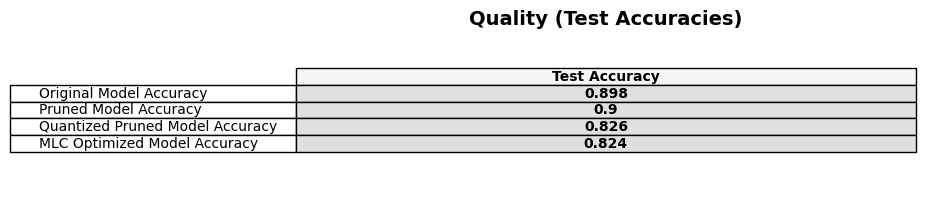

In [40]:
# 1. Test Accuracy Table
accuracy_data = np.array([[v] for v in test_accuracies.values()])
accuracy_columns = ['Test Accuracy']
accuracy_rows = list(test_accuracies.keys())
plot_table(accuracy_data, "Quality (Test Accuracies)", accuracy_columns, accuracy_rows, None, None, "accuracy_table")

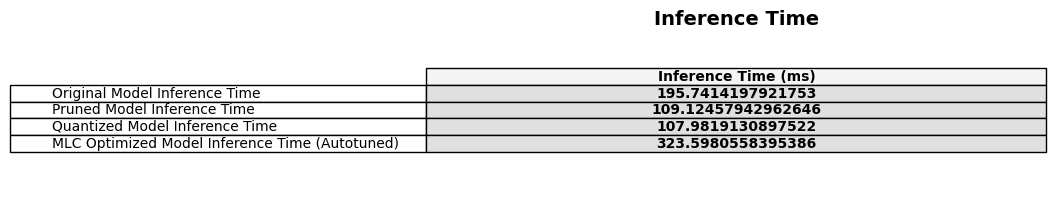

In [41]:
# 2. Inference Time Table
inference_time_data = np.array([[v] for v in inference_times.values()])
inference_time_columns = ['Inference Time (ms)']
inference_time_rows = list(inference_times.keys())
plot_table(inference_time_data, "Inference Time", inference_time_columns, inference_time_rows, None, None, "inference_time_table")

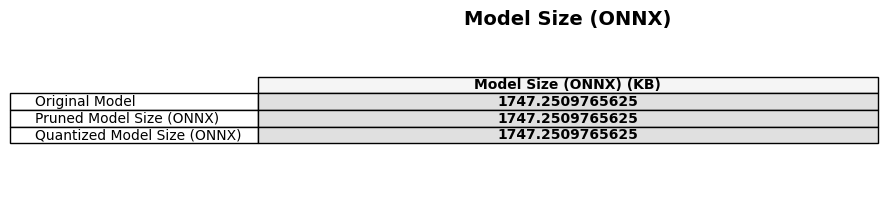

In [42]:
# 3. Model Size (ONNX) Table
onnx_size_data = np.array([[v] for v in model_sizes_onnx.values()])
onnx_size_columns = ['Model Size (ONNX) (KB)']
onnx_size_rows = list(model_sizes_onnx.keys())
plot_table(onnx_size_data, "Model Size (ONNX)", onnx_size_columns, onnx_size_rows, None, None, "onnx_size_table")

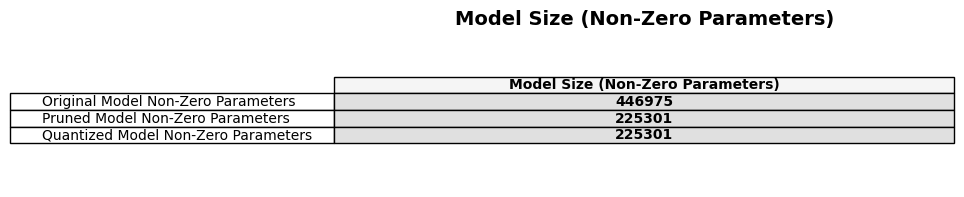

In [43]:
# 4. Model Size (Non-Zero Parameters) Table
nonzero_params_data = np.array([[v] for v in model_size_nonzero_parms.values()])
nonzero_params_columns = ['Model Size (Non-Zero Parameters)']
nonzero_params_rows = list(model_size_nonzero_parms.keys())
plot_table(nonzero_params_data, "Model Size (Non-Zero Parameters)", nonzero_params_columns, nonzero_params_rows, None, None, "nonzero_params_table")
